# Logistic Regression

statistical detail review https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

- Predicts a binary outcome based on an observed dataset. 

- Finds relationship between 2 data patterns and then predicts the value of one of those factors based on another. 

- finds the probability of a binary event occurring


Use Cases
- Fraud Detection
- Credit Scoring
- Hotel Booking
- Gaming
- Speech Detection
- Spam
- Product someone is likely to buy
- Disease risk
- Party affiliation

It is important that the dependent variable X axis fits into two buckets

The independent or Y axis variables should not have a high correlation with each other (multicollinearity between predictor variables)

The independent variables should also be related to the log odds or just the odds. 
If we are looking at who is a approved for a loan  the approved and not approved are the dependent variable and the independent variables should relate to the odds of being approved or not approved. 

Logistic Regression likes large sample sizes.


Types of Logistic Regression:

    Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
    Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.
    Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.



#### Pass Fail


In [2]:
# refresher on path
#Change the current working directory
import os
from pathlib import Path
import pandas as pd
path = str(Path('C:/Users/Matth/OneDrive/Desktop/DATA'))
os.chdir(path)
os.getcwd()

'C:\\Users\\Matth\\OneDrive\\Desktop\\DATA'

In [3]:
pf= pd.read_csv(path +'/passfail.csv')
pf

,minutes,grade
0,100,F
1,100,F
2,150,F
3,98,F
4,103,F
5,350,P
6,195,P
7,205,F
8,200,F
9,300,P


<Axes: xlabel='minutes', ylabel='grade'>

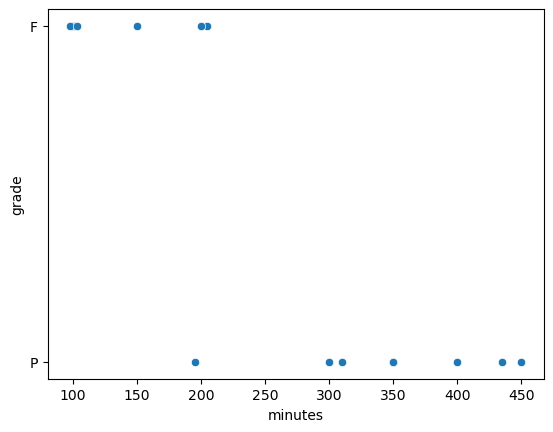

In [6]:
import seaborn as sns
sns.scatterplot(data = pf, x = 'minutes', y = 'grade')

In [17]:
# split lable in to feature and target
#split dataset in features and target variable
feature_cols = ['minutes']
X = pf[feature_cols] # Features
y = pf.grade # Target variable
X_test = [[100],[400]]

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X, y)

LogisticRegression(random_state=16)

In [20]:
# make a prediction
logreg.predict(X_test)

C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['F', 'P'], dtype=object)

In [1]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv("C://Users//Matth//OneDrive//Desktop//DATA//diabetes.csv", header=1, names=col_names)

In [2]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,0,137,40,35,168,43.1,2.288,33,1
1,3,78,50,32,88,31.0,0.248,26,1
2,2,197,70,45,543,30.5,0.158,53,1
3,1,189,60,23,846,30.1,0.398,59,1
4,5,166,72,19,175,25.8,0.587,51,1


In [3]:
df.shape

(391, 9)

In [4]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,3.306905,122.713555,70.675192,29.161125,156.214834,33.098977,0.523957,30.890026,0.332481
std,3.213422,30.853247,12.509868,10.525287,118.952349,7.032120,0.345459,10.201593,0.471706
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.500000,28.400000,0.270500,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,126.000000,33.200000,0.452000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

<Axes: xlabel='age'>

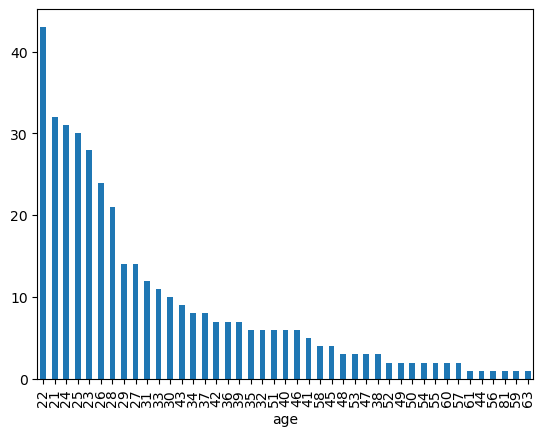

In [6]:
df.age.value_counts().plot(kind='bar')

<Axes: xlabel='label'>

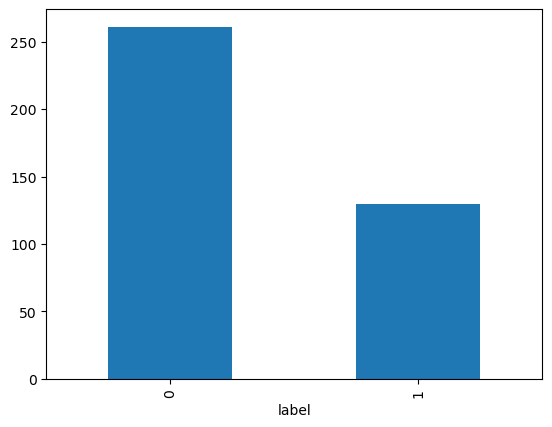

In [7]:
df.label.value_counts().plot(kind='bar')

<Axes: xlabel='glucose', ylabel='skin'>

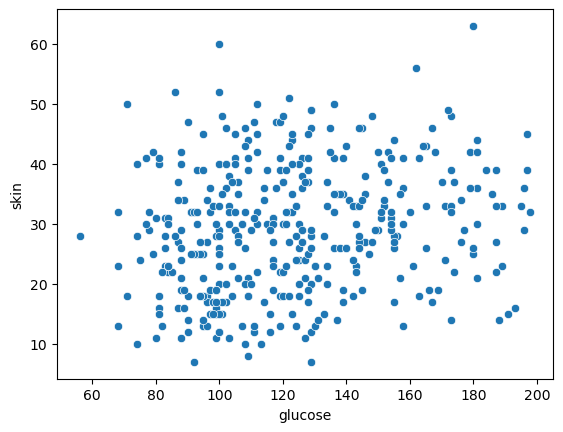

In [8]:
import seaborn as sns
sns.scatterplot(data=df, x='glucose', y = 'skin')

<Axes: xlabel='glucose', ylabel='skin'>

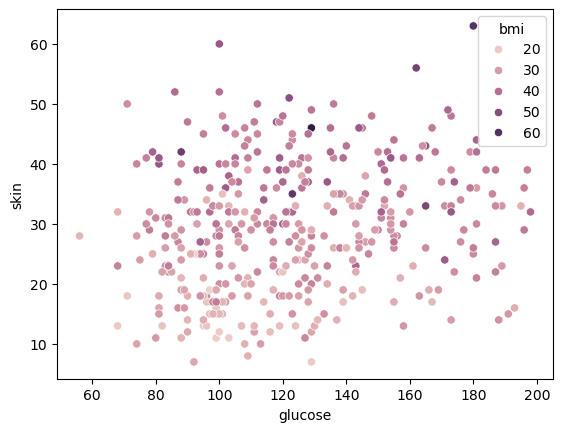

In [10]:
sns.scatterplot(data=df, x='glucose', y = 'skin', hue= 'bmi')


C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


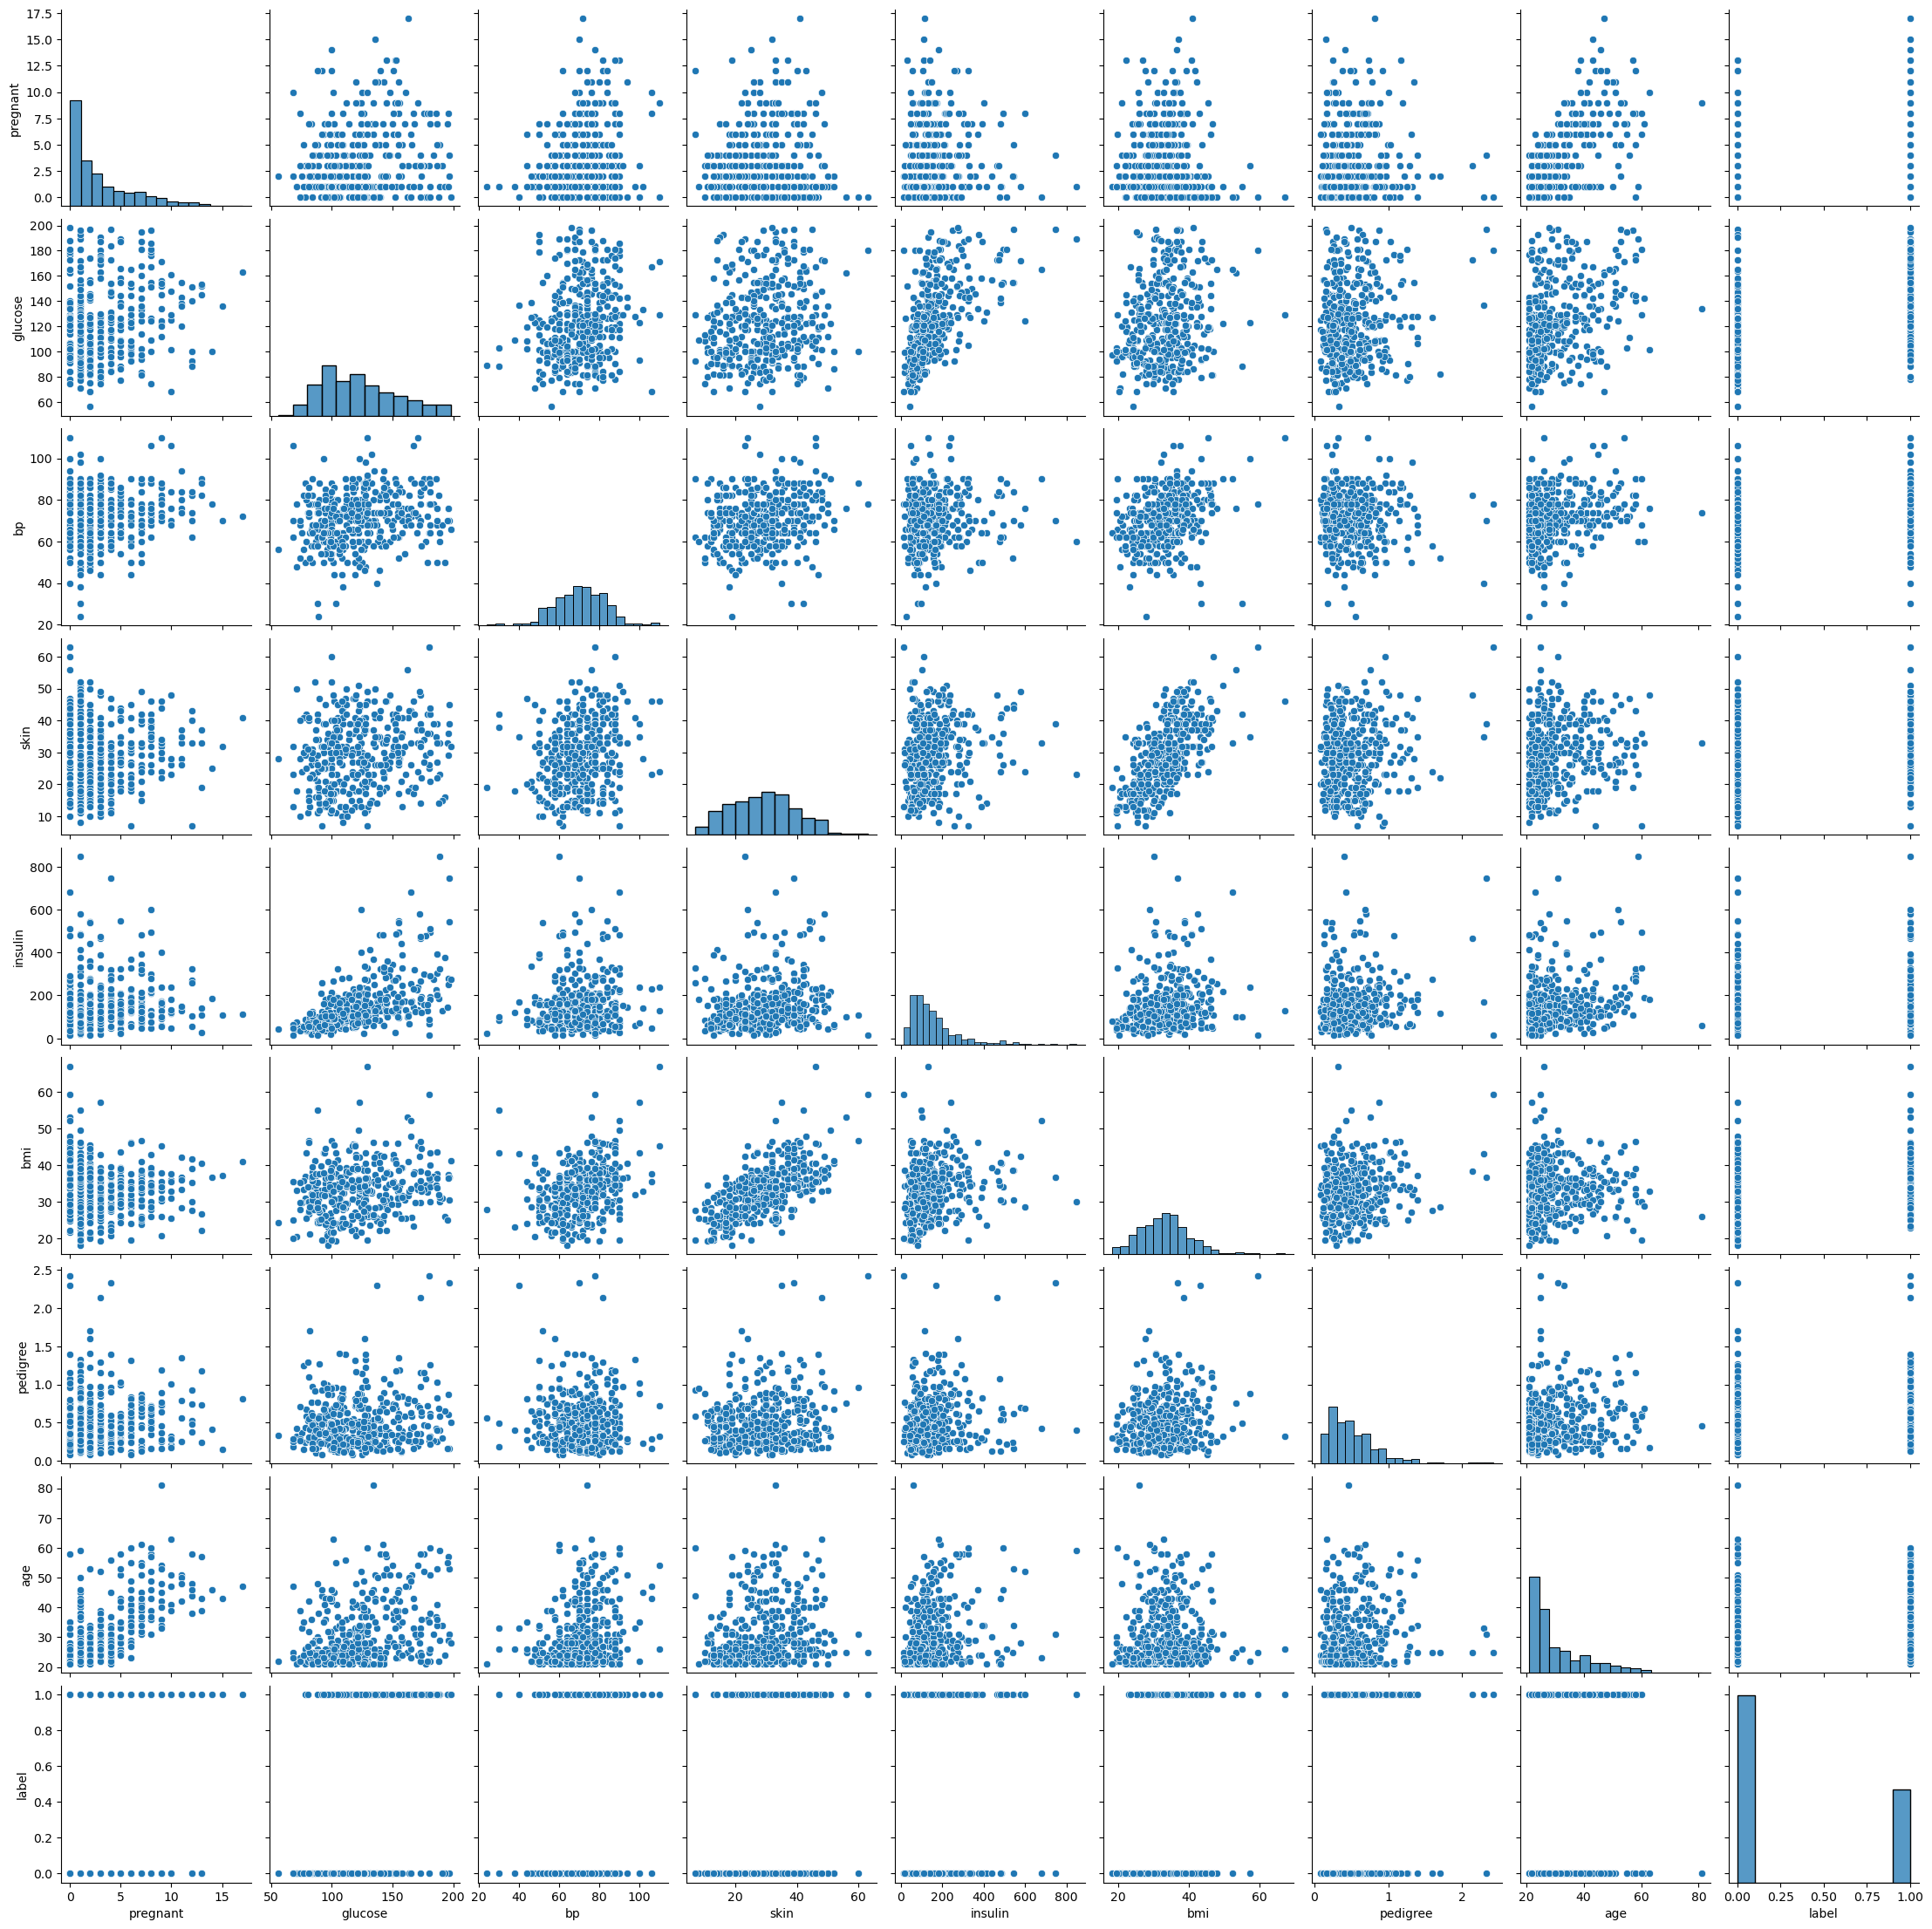

In [11]:
sns.pairplot(df)

What in here might be more of a logistic regression?

In [12]:
# split lable in to feature and target
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

In [13]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [14]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [15]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[57,  9],
       [13, 19]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

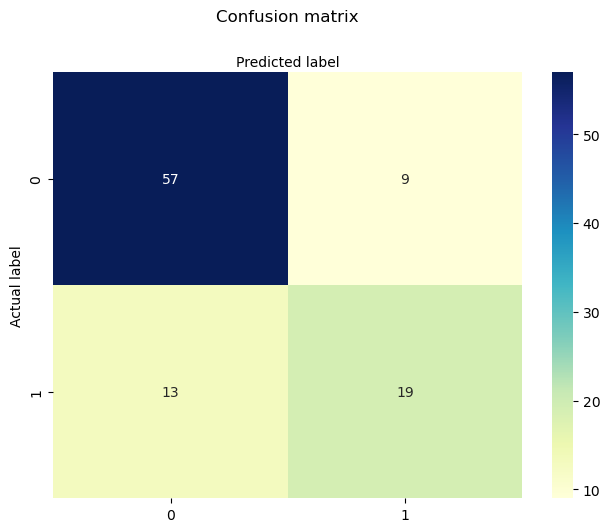

In [18]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.81      0.86      0.84        66
   with diabetes       0.68      0.59      0.63        32

        accuracy                           0.78        98
       macro avg       0.75      0.73      0.74        98
    weighted avg       0.77      0.78      0.77        98



Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

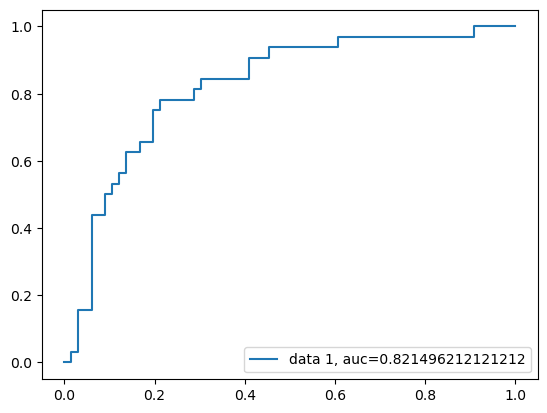

In [20]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Another example using Titanic

In [129]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report


import seaborn as sns
df = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//titanic.csv')
df

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [175]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report


import seaborn as sns
df = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [177]:
# how many rows and columns?
df.shape


(1310, 14)

In [178]:
#how many survived and how many died?
df.groupby ('survived').size()

survived
0.0    809
1.0    500
dtype: int64

<Axes: xlabel='survived', ylabel='count'>

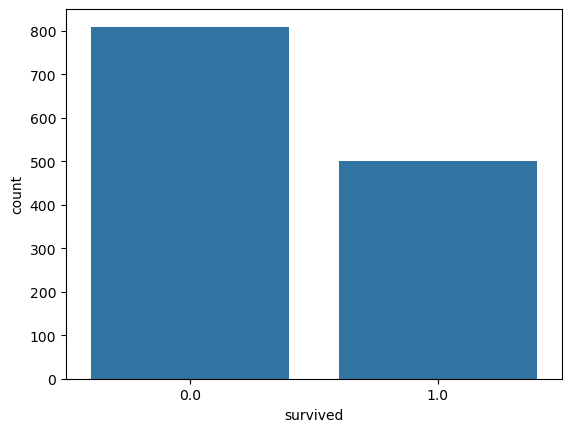

In [179]:
sns.countplot (x ="survived", data = df)

<Axes: xlabel='survived', ylabel='count'>

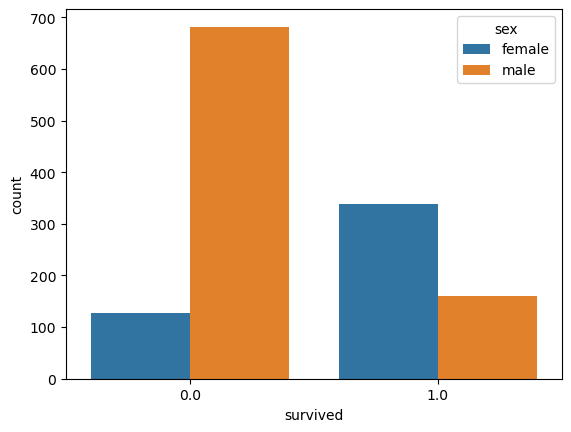

In [180]:
sns.countplot (x ="survived", hue = "sex", data = df)

<Axes: xlabel='pclass', ylabel='age'>

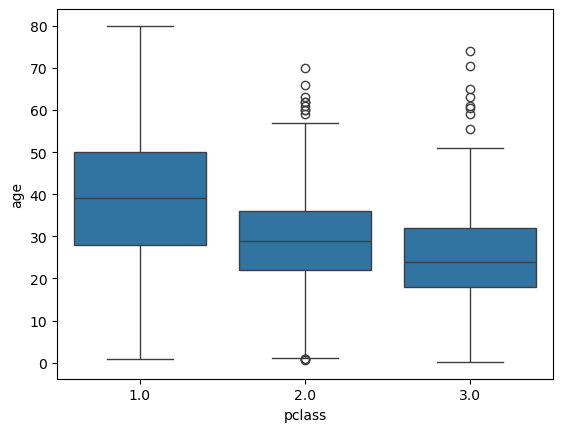

In [181]:
sns.boxplot( x = 'pclass', y = 'age', data = df)

<Axes: xlabel='sibsp', ylabel='count'>

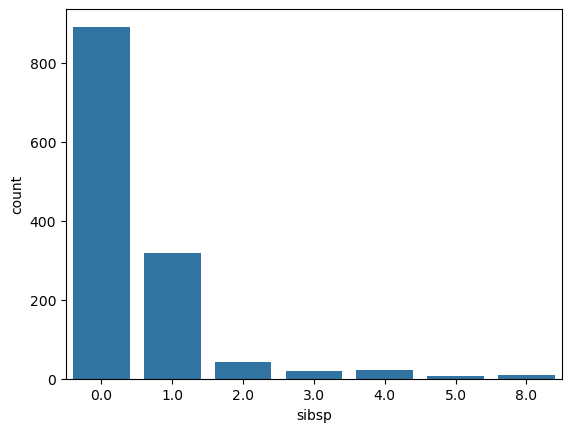

In [182]:
sns.countplot (x ="sibsp", data = df)

In [185]:
# drop unwanted fields
df_clean = df.drop (columns = ['name', 'cabin', 'embarked', 'ticket', 'boat', 'home.dest', 'pclass'], axis = 1)

In [186]:
df_clean.isnull().sum()

survived       1
sex            1
age          264
sibsp          1
parch          1
fare           2
body        1189
dtype: int64

In [187]:
df_clean.dtypes

survived    float64
sex          object
age         float64
sibsp       float64
parch       float64
fare        float64
body        float64
dtype: object

In [188]:
pd.get_dummies (df_clean['sex'],dtype=int).head (5)

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [192]:
binary_sex = pd.get_dummies (df_clean['sex'],dtype=int,drop_first = True)

In [193]:
df2 = pd.concat([df_clean, binary_sex],axis = 1)

In [194]:
df2.head()

,survived,sex,age,sibsp,parch,fare,body,male
0,1.0,female,29.0000,0.0,0.0,211.3375,NaN,0
1,1.0,male,0.9167,1.0,2.0,151.5500,NaN,1
2,0.0,female,2.0000,1.0,2.0,151.5500,NaN,0
3,0.0,male,30.0000,1.0,2.0,151.5500,135.0,1
4,0.0,female,25.0000,1.0,2.0,151.5500,NaN,0


In [195]:
# df3 final dataset ready to model
df3 = df2.drop (columns = ['sex', 'body'])
df3.head (5)

,survived,age,sibsp,parch,fare,male
0,1.0,29.0000,0.0,0.0,211.3375,0
1,1.0,0.9167,1.0,2.0,151.5500,1
2,0.0,2.0000,1.0,2.0,151.5500,0
3,0.0,30.0000,1.0,2.0,151.5500,1
4,0.0,25.0000,1.0,2.0,151.5500,0


In [196]:
df3.dtypes

survived    float64
age         float64
sibsp       float64
parch       float64
fare        float64
male          int32
dtype: object

In [197]:
# Model the data set
Y= df3['survived']
X= df3.drop(['survived'], axis = 1 )
# someone tell me what I just did

In [198]:
X.head()

,age,sibsp,parch,fare,male
0,29.0000,0.0,0.0,211.3375,0
1,0.9167,1.0,2.0,151.5500,1
2,2.0000,1.0,2.0,151.5500,0
3,30.0000,1.0,2.0,151.5500,1
4,25.0000,1.0,2.0,151.5500,0


In [199]:
Y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: survived, dtype: float64

In [200]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = .2, random_state = 1)

In [201]:
# Let's troubleshoot some errors
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [205]:
df3 = df3.dropna()
df3

,survived,age,sibsp,parch,fare,male
0,1.0,29.0000,0.0,0.0,211.3375,0
1,1.0,0.9167,1.0,2.0,151.5500,1
2,0.0,2.0000,1.0,2.0,151.5500,0
3,0.0,30.0000,1.0,2.0,151.5500,1
4,0.0,25.0000,1.0,2.0,151.5500,0
...,...,...,...,...,...,...
1301,0.0,45.5000,0.0,0.0,7.2250,1
1304,0.0,14.5000,1.0,0.0,14.4542,0
1306,0.0,26.5000,0.0,0.0,7.2250,1
1307,0.0,27.0000,0.0,0.0,7.2250,1


In [204]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [208]:
# Model the data set
Y= df3['survived']
X= df3.drop(['survived'], axis = 1 )
# someone tell me what I just did
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = .2, random_state = 1)

In [214]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [836, 293]

In [212]:
print(Y_train.shape)
print(X_train.shape)
print(Y_train.shape)
print(y_train.shape)

(836,)
(836, 5)
(836,)
(293,)


In [215]:
LogReg = LogisticRegression()
LogReg.fit(X_train,Y_train)

LogisticRegression()

In [218]:
predictions = LogReg.predict(X_test)

In [220]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       112
         1.0       0.80      0.80      0.80        97

    accuracy                           0.82       209
   macro avg       0.82      0.82      0.82       209
weighted avg       0.82      0.82      0.82       209



In [221]:
print(confusion_matrix (Y_test, predictions))

[[93 19]
 [19 78]]


In [222]:
accuracy_score (Y_test, predictions)

0.8181818181818182

In [1]:
#Exercise
#Review as a linear and then a logistic regression

# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values(by='al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1




Question: Pretend that we want to predict ri, and our only feature is al. How could we do it using machine learning?

Answer: We could frame it as a regression problem, and use a linear regression model with al as the only feature and ri as the response.

Question: How would we visualize this model?

Answer: Create a scatter plot with al on the x-axis and ri on the y-axis, and draw the line of best fit.


C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


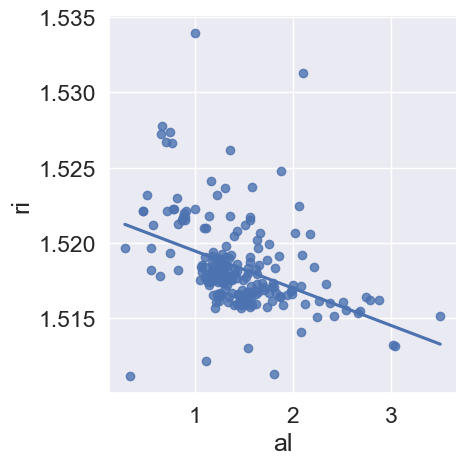

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
# using seaborn, create a scatterplot using seaborn of the al values vs the ri values
sns.lmplot(x='al', y='ri', data=glass, ci=None)

<Axes: xlabel='al', ylabel='ri'>

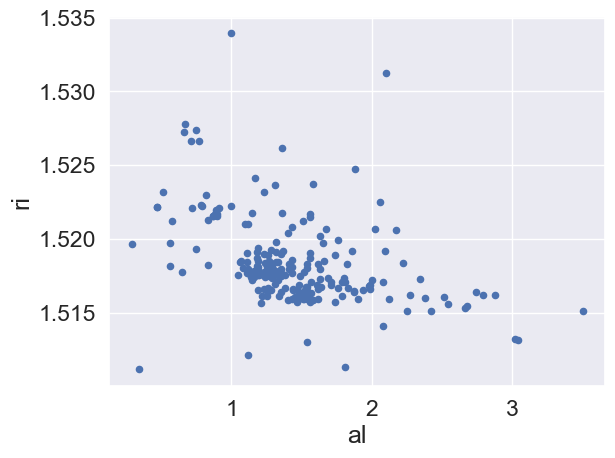

In [5]:
#Question: How would we draw this plot without using Seaborn?
# create the same scatter plot of al and ri using Pandas .plot() method
glass.plot(kind='scatter', x='al', y='ri')






Text(0, 0.5, 'ri')

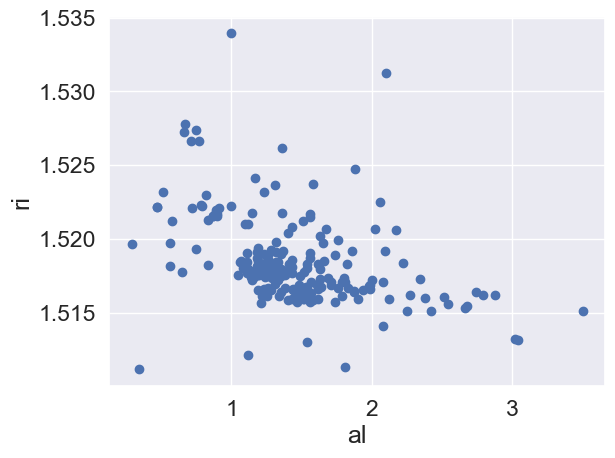

In [6]:
# equivalent scatter plot using Matplotlib directly
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [9]:
# fit a linear regression model
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


linreg.fit(X, y)

LinearRegression()

In [10]:
# make predictions for all values of X and add them to the glass dataframe as a new column named "ri_pred"
glass['ri_pred'] = linreg.predict(X)
glass.head()


,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0, 0.5, 'Predicted ri')

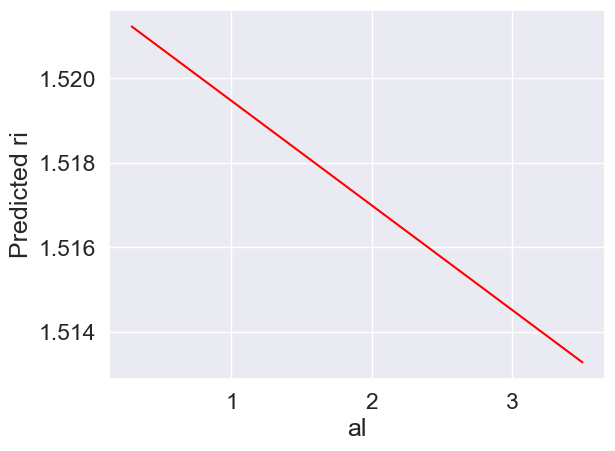

In [11]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

Text(0, 0.5, 'ri')

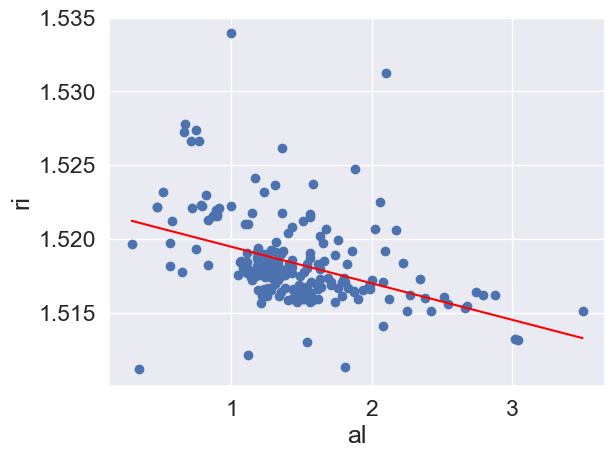

In [12]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

In [13]:
# interpreting linear regression coefficients
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [17]:
X.shape

(214, 1)

In [18]:
y.shape

(214,)

In [20]:
# compute prediction for al=2 using the predict method
linreg.predict([[2]])

C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.51699012])

In [22]:
# examine coefficient for al
list(zip(feature_cols, linreg.coef_))


[('al', -0.0024776063874696274)]

In [ ]:
# Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'

In [23]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [25]:
# compute prediction for al=3 using the predict method
linreg.predict([[3]])

C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.51451251])

#### Part 2: Predicting a Categorical Response

In [26]:
# Let's look at the column names and first row
glass.head(1)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.0,0.0,0.0,1,1.521227


In [27]:
glass.glass_type.value_counts()

glass_type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [28]:
# examine the number of observations by glass_type
glass.glass_type.value_counts().sort_index()

glass_type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [29]:


# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()



,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Let's change our task, so that we're predicting household using al. Let's visualize the relationship to figure out how to do this:

Text(0, 0.5, 'household')

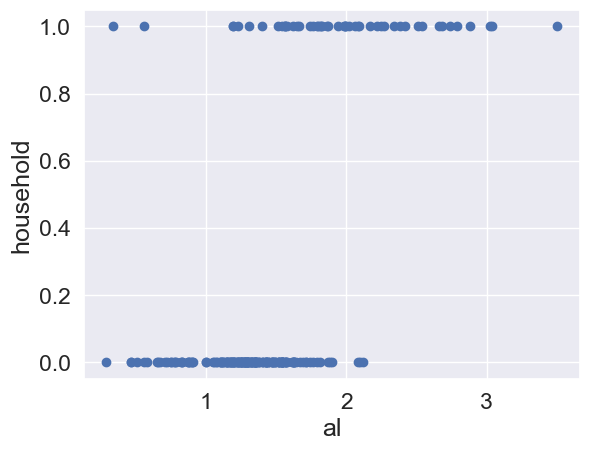

In [30]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [31]:
#Let's draw a regression line, like we did before:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0, 0.5, 'household')

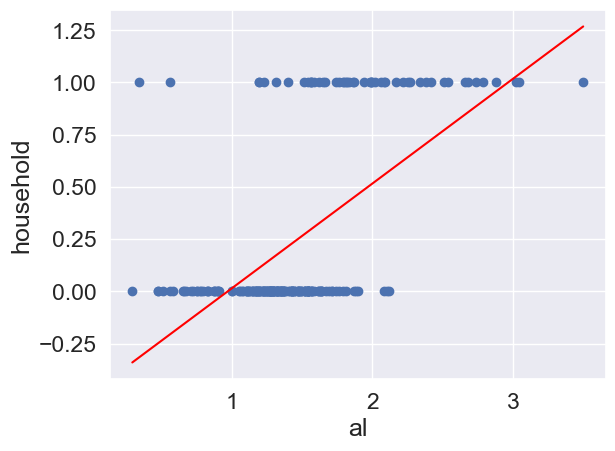

In [32]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')



If al=3, what class do we predict for household? 1

If al=1.5, what class do we predict for household? 0

We predict the 0 class for lower values of al, and the 1 class for higher values of al. What's our cutoff value? Around al=2, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.


In [33]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [34]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.tail()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1.515033,1,0.912448,1
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1.514810,1,0.957554,1
173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.514463,1,1.027718,1
172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.514413,1,1.037742,1
164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,1.513274,1,1.268283,1


Text(0, 0.5, 'household')

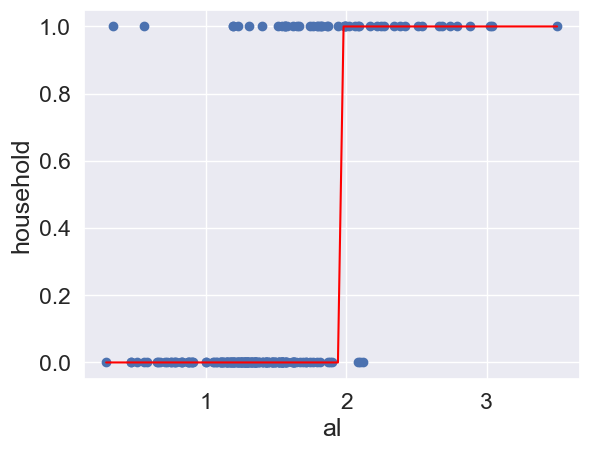

In [35]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')


Part 3: Using Logistic Regression Instead

Logistic regression can do what we just did and give us the probability of the prediction being correct


In [38]:
# fit a logistic regression model and store the class predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

Text(0, 0.5, 'household')

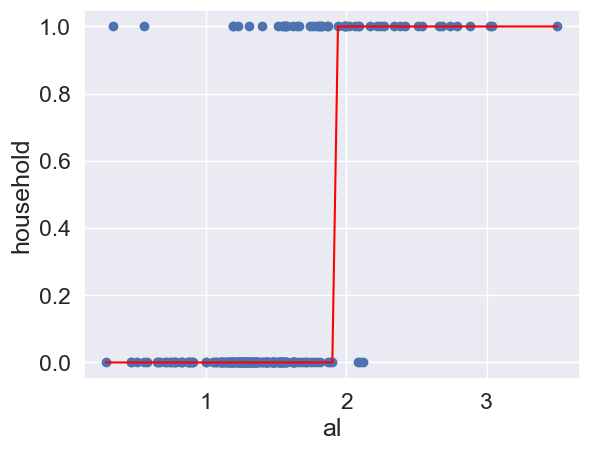

In [39]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

With logistic regression we can easily get the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction.

In [42]:


# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass.head()


,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.006024
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.007032
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.010506
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.010506
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.011884


Text(0, 0.5, 'household_pred_prob')

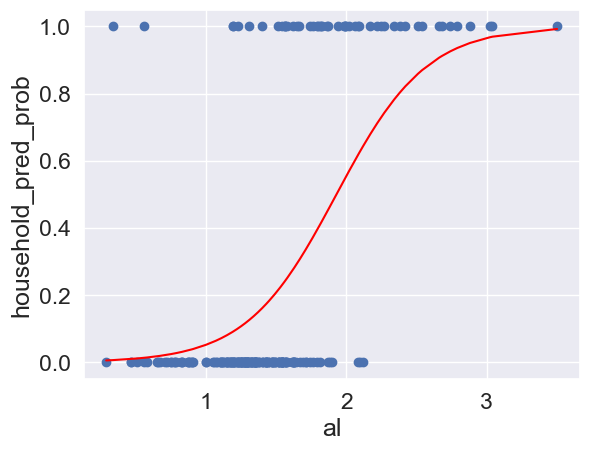

In [43]:

# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household_pred_prob')

In [46]:
# examine some example predictions
print(logreg.predict([[1]]))
print(logreg.predict([[2]]))
print(logreg.predict([[3]]))

[0]
[1]
[1]


C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.94755733 0.05244267]]
[[0.4449707 0.5550293]]
[[0.03435025 0.96564975]]


C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'household')

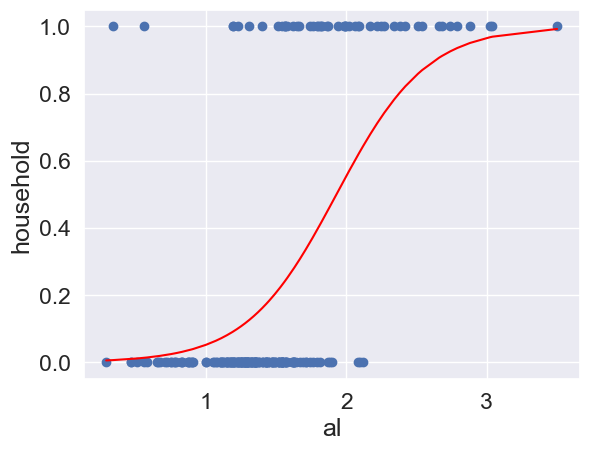

In [48]:
#Part 4: Interpreting Logistic Regression Coefficients
    # plot the predicted probabilities again
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [49]:


# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba([[2]])



C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.4449707, 0.5550293]])

In [50]:
# examine the coefficient for al
list(zip(feature_cols, logreg.coef_[0]))



[('al', 3.115179268157016)]

In [ ]:
# Part 7: Using Logistic Regression with Categorical Features

In [51]:
# create a categorical feature
glass['high_al'] = np.where(glass.al > 2, 1, 0)

C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


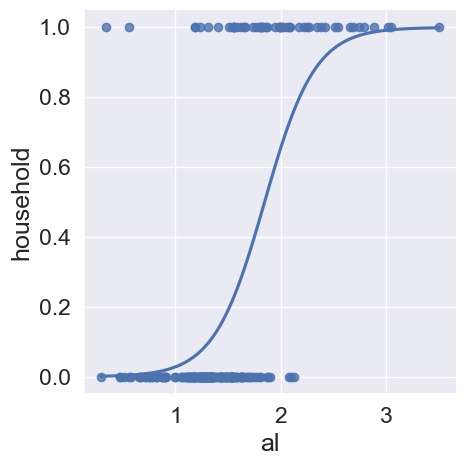

In [52]:
# original (continuous) feature
sns.lmplot(x='al', y='household', data=glass, ci=None, logistic=True)

C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


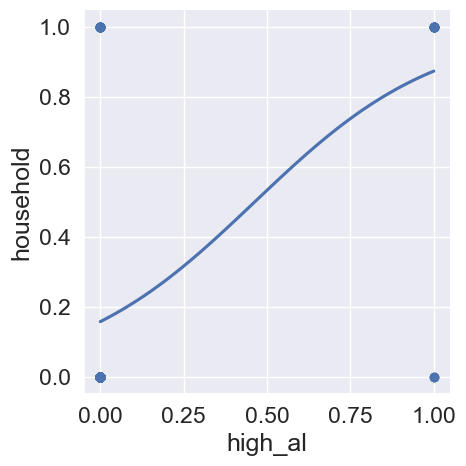

In [53]:
# categorical feature
sns.lmplot(x='high_al', y='household', data=glass, ci=None, logistic=True)

C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


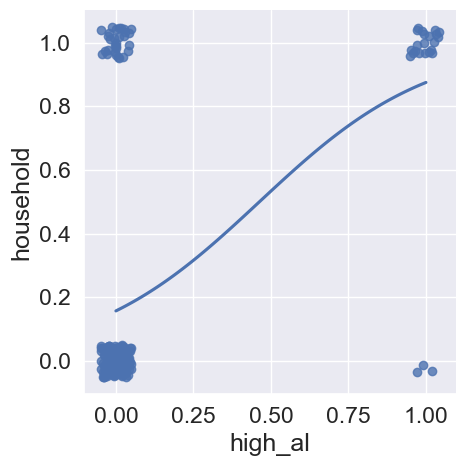

In [54]:
# categorical feature, with jitter added
sns.lmplot(x='high_al', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [55]:


# fit a logistic regression model
feature_cols = ['high_al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)



LogisticRegression()

In [56]:
logreg.predict([[.2]])

C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [57]:
logreg.predict([[.8]])

C:\Users\Matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)


#### Part 8: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

    Highly interpretable (if you remember how)
    Model training and prediction are fast
    No tuning is required (excluding regularization)
    Features don't need scaling
    Can perform well with a small number of observations
    Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

    Presumes a linear relationship between the features and the log-odds of the response
    Works only on datasets with binary responses unless extended by breaking larger numbers of responses into multiple binary problems or Multinomial logistic regression is used
    Performance is (generally) not competitive with the best supervised learning methods
    Can't automatically learn feature interactions

